In [4]:
from pathlib import Path

import holoviews as hv
import panel as pn
import param
import polars as pl

pn.extension(
    sizing_mode="stretch_width",
)


In [5]:
class Trial(param.Parameterized):
    session = param.FileSelector(path="data/BFINAC_VNS/parquet/*/trials.parquet")
    trial = param.Integer(default=1)

    def view(self):
        return (
            pl.scan_parquet(Path(self.session).parent / f"{self.trial}.parquet")
            .select("x", "y")
            .collect()
            .plot()
        )

    def animation(self):
        return hv.Path(
            pl.scan_parquet(Path(self.session).parent / f"{self.trial}.parquet")
            .select("x", "y")
            .collect()
            .to_dict(),
            # extents=(-10, -10, 10, 10),
        )

    def fractal(self):
        return pl.read_parquet(self.session)[self.trial, "fractals"]

    def target_angle(self):
        return pl.read_parquet(self.session)[self.trial, "targAngle"]

    def target_amplitude(self):
        return pl.read_parquet(self.session)[self.trial, "targAmp"]


trial = Trial()


def view(point):
    return hv.Points([point])


df = pl.read_parquet("data/BFINAC_VNS/parquet/BFnovelinac_01_02_2019_15_03/1.parquet")


player = pn.widgets.Player()
cursor = pn.bind(view, player)
pn.Row(
    trial.param, pn.Column(trial.fractal, trial.target_angle, player, cursor)
).servable()
# pn.Row(
#     pn.Column(trial.view),
#     pn.Column(trial.animation),
# ).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'43f9bb38-a2dc-4f47-b1c5-b1e3f89d222d': {'version…

In [ ]:
pl.read_parquet("data/BFINAC_VNS/parquet/BFnovelinac_01_02_2019_15_03/trials.parquet")


trialnumber,fractals,targAngle,targAmp,goodtrial,fixreq,datapixxtime,trialstarttime,timefpon,timefpoff,windowchosen,timetargetoff,feedid,TrialTypeSave,timefpabort,repeatflag,monkeynotinitiated
i64,i64,f64,f64,bool,bool,f64,f64,f64,f64,bool,f64,i64,i64,f64,bool,bool
1,6212,0.0,10.0,true,true,21298.512505,7.0000e6,0.758113,2.041627,false,4.533639,6212,6112,0.0,false,false
2,6202,0.0,10.0,true,true,21308.260766,7.0000e6,0.760564,2.027416,false,4.519422,6202,6102,0.0,false,false
3,6302,0.0,10.0,true,true,21316.614368,7.0000e6,0.757499,1.866344,false,4.366287,6302,6102,0.0,false,false
4,6212,180.0,10.0,true,true,21326.137578,7.0000e6,0.760028,1.868525,false,4.368879,6212,6112,0.0,false,false
5,6202,180.0,10.0,true,true,21334.392459,7.0000e6,0.764097,1.872531,false,4.372937,6202,6102,0.0,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
504,6202,180.0,10.0,false,true,25009.668284,7.0037e6,0.764094,-1.0,false,NaN,6202,6102,2.155961,true,false
505,6202,180.0,10.0,false,true,25013.591259,7.0037e6,0.758053,-1.0,false,NaN,6202,6102,1.074773,true,false
506,6202,180.0,10.0,true,true,25016.411008,7.0037e6,0.763456,1.871972,false,4.372392,6202,6102,0.0,false,false


In [2]:
hv.help(hv.Path)


Parameters of 'Path'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                        Value                     Type     Bounds   Mode 

group                       'Path'                   String             C RW 
label                         ''                     String             C RW 
cdims                         {}                      Dict              V RW 
kdims          [Dimension('x'), Dimension('y')]       List     (2, 2)   C RW 
vdims                         []                      List   (0, None)  C RW 
extents            (None, None, None, None)          Tuple              V RW 
datatype   ['multitabular', 'spatialpandas', 'da...   List   (0, None)  V RW 

Parameter docstrings:

group:    A string describing the data wrapped by the object.
label:    Optional label describing the data, typically reflecting where
          or how it was m

In [7]:
import os

import numpy as np
import polars as pl
import scipy

for mat in Path("data/BFINAC_VNS").glob("*.mat"):
    label = mat.stem
    lick_path = f"data/BFINAC_VNS/{label}/licking"
    if not os.path.exists(lick_path):
        os.mkdir(lick_path)
    lickdata = scipy.io.loadmat(mat)["PDS"]["onlineLickForce"][0].item()[0]

    for i in range(len(lickdata)):
        # debug(images[i].item())
        pl.DataFrame(lickdata[i]).write_parquet(
            f"data/BFINAC_VNS/{label}/licking/{i}.parquet"
        )


In [1]:
import scipy

mat = scipy.io.loadmat("data/BFINAC_VNS/BFnovelinac_22_10_2018_16_11.mat")
mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'PDS', 'c', 's', '__function_workspace__'])

In [2]:
pds = mat["PDS"]
pds.dtype


dtype([('timeFocused', 'O'), ('acquisitionTime', 'O'), ('stableWindowByTrial', 'O'), ('meanPrestimulusDialation', 'O'), ('fixOverlap', 'O'), ('trialnumber', 'O'), ('targetacquisitionthreshold', 'O'), ('fractals', 'O'), ('targetAcquisitionBegin', 'O'), ('targetAcquisitionFirst', 'O'), ('targAngle', 'O'), ('targAmp', 'O'), ('goodtrial', 'O'), ('fixreq', 'O'), ('outcomedel', 'O'), ('ITI_dur', 'O'), ('datapixxtime', 'O'), ('trialstarttime', 'O'), ('timefpon', 'O'), ('timefpoff', 'O'), ('timetargeton', 'O'), ('loopCountOfTargetOn', 'O'), ('loopCountOfTargetOff', 'O'), ('windowchosen', 'O'), ('timetargetoff', 'O'), ('feedid', 'O'), ('TrialTypeSave', 'O'), ('timeofabort', 'O'), ('timefpabort', 'O'), ('timeoutcome', 'O'), ('repeatflag', 'O'), ('monkeynotinitiated', 'O'), ('FEEDbacktime', 'O'), ('EyeJoy', 'O'), ('onlineEye', 'O'), ('onlineLickForce', 'O'), ('spikes', 'O'), ('sptimes', 'O'), ('blinkthreshold', 'O'), ('blinkTimeAllowed', 'O'), ('trueCS_dur', 'O'), ('samplesBlinkLogical', 'O'), ('

In [15]:
pds["sptimes"]


array([[array([[array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], shape=(0, 0), dtype=uint8),
                array([], sh

In [13]:
import polars as pl

pl.DataFrame(pds["samplesBlinkLogical"][0][0][0][0].T).select(pl.sum("column_0"))


column_0
i64
0


In [3]:
pl.DataFrame(pds["onlineLickForce"][0].item()[0][0])


NameError: name 'pl' is not defined

In [5]:
pds["trialnumber"]


array([[array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                 14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
                 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
                 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
                 53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
                 66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
                 79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
                 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
                105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
                118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]],
              dtype=uint8)                                                      ]],
      dtype=object)

In [42]:
pds["onlineLickForce"][0].item().shape


(1, 128)

In [6]:
pds["fixOverlap"]


array([[array([[0.35, 0.35, 0.35, 0.35, 0.35, 0.35,  nan, 0.35,  nan, 0.35, 0.35,
                0.35, 0.35, 0.35, 0.35, 0.35, 0.35,  nan, 0.35, 0.35, 0.35, 0.35,
                0.35, 0.35, 0.35,  nan, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,
                 nan,  nan, 0.35,  nan,  nan,  nan,  nan, 0.35, 0.35, 0.35, 0.35,
                0.35, 0.35, 0.35,  nan, 0.35, 0.35, 0.35,  nan, 0.35, 0.35, 0.35,
                0.35, 0.35, 0.35, 0.35, 0.35, 0.35,  nan, 0.35, 0.35, 0.35, 0.35,
                 nan, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,  nan, 0.35, 0.35,  nan,
                0.35, 0.35, 0.35,  nan,  nan, 0.35, 0.35,  nan, 0.35,  nan, 0.35,
                0.35, 0.35,  nan, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,  nan, 0.35,
                 nan, 0.35, 0.35,  nan, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,
                0.35, 0.35, 0.35,  nan, 0.35,  nan, 0.35, 0.35, 0.35, 0.35, 0.35,
                 nan, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]])                      ]],
      dtype=o

In [3]:
import pandas as pd

img1 = pd.DataFrame(pds["img1"].item())


In [10]:
img1.size


128

In [4]:
img1_0 = img1[0]


In [5]:
img1_0.item().shape


(100, 100, 3)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
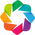

:RGB   [x,y]   (R,G,B)

In [6]:
import holoviews as hv

hv.extension("bokeh")

hv.RGB(img1_0.item())


In [7]:
np.save("1", img1_0.item())


In [4]:
pds["loopCountOfTargetOn"]


array([[array([[ 716.,  763.,  838.,  730.,  834.,  815.,   nan,  869.,   nan,
                 735.,  724.,  718.,  722.,  738.,  785.,  802.,  873.,   nan,
                 736.,  814.,  742.,  721.,  790.,  816.,  734.,   nan,  731.,
                 800.,  777.,  743.,  738.,  818.,  832.,   nan,   nan,  744.,
                  nan,   nan,   nan,   nan,  766.,  802.,  729.,  800.,  840.,
                 839.,  799.,   nan,  823.,  788.,  804.,   nan,  727.,  728.,
                 723.,  830.,  827.,  731.,  728.,  807.,  846.,   nan,  782.,
                 805., 1007.,  734.,   nan,  814.,  832.,  738.,  843.,  823.,
                 801.,   nan,  728.,  750.,   nan,  732.,  796.,  840.,   nan,
                  nan,  747.,  728.,   nan,  729.,   nan,  821.,  800.,  752.,
                  nan,  842.,  741.,  731.,  737.,  793.,  807.,   nan,  731.,
                  nan,  806., 1218.,   nan,  733.,  826.,  897.,  835.,  861.,
                 732.,  730.,  732.,  860.,  738.,  

In [9]:
pds["timeFocused"]


array([[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])        ]],
      dtype=object)

In [6]:
pds["acquisitionTime"]


array([[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])        ]],
      dtype=object)

In [ ]:
pds["acquisitionTime"]


In [8]:
mat["c"].dtype


dtype([('targetAcquisitionRequired', 'O'), ('fixOverlap', 'O'), ('probblockonly', 'O'), ('minFixDur', 'O'), ('maxFixDur', 'O'), ('freeRewardProbability', 'O'), ('fp1WindH', 'O'), ('fp1WindW', 'O'), ('maxFixWait', 'O'), ('targFixDurReq', 'O'), ('tp1WindH', 'O'), ('tp1WindW', 'O'), ('choicemax', 'O'), ('targetdur', 'O'), ('fpX', 'O'), ('fpY', 'O'), ('overlapMin', 'O'), ('overlapMax', 'O'), ('minLatency', 'O'), ('maxLatency', 'O'), ('minTargFix', 'O'), ('maxTargFix', 'O'), ('rewardDur', 'O'), ('vFiltLength', 'O'), ('passEye', 'O'), ('vThresh', 'O'), ('postChoiceOnScreenTime', 'O'), ('output_prefix', 'O'), ('protocol_title', 'O'), ('TargAmp', 'O'), ('numTargAngles', 'O'), ('rewardDelay', 'O'), ('j', 'O'), ('trialnumber', 'O'), ('EyePtR', 'O'), ('fixdotW', 'O'), ('fixwinW', 'O'), ('cursorW', 'O'), ('framerate', 'O'), ('useDataPixxBool', 'O'), ('quit', 'O'), ('screen_number', 'O'), ('minTargAmp', 'O'), ('maxTargAmp', 'O'), ('freelookingset', 'O'), ('rasterLineCount', 'O'), ('runflag', 'O'), 

In [9]:
mat["s"].dtype


dtype([('TrialNumber', 'O'), ('TrialType', 'O'), ('TrialType1', 'O'), ('blocknumber', 'O'), ('successfulTrials', 'O'), ('choiceblocksCompleted', 'O'), ('choicetrialsCompleted', 'O'), ('targXY', 'O'), ('escapeXY', 'O'), ('fixDur', 'O'), ('RewardTime', 'O'), ('fixXY', 'O'), ('EyeX', 'O'), ('EyeY', 'O')])

In [10]:
mat["s"]


array([[(array([[128]], dtype=uint8), array([[6101]], dtype=uint16), array([[0]], dtype=uint8), array([[1]], dtype=uint8), array([[86]], dtype=uint8), array([[0]], dtype=uint8), array([[-1]], dtype=int16), array([[10,  0]], dtype=uint8), array([[ 0, 10]], dtype=uint8), array([[0.5]]), array([[0.36192]]), array([[0, 0]], dtype=uint8), array([[531]], dtype=uint16), array([[521]], dtype=uint16))]],
      dtype=[('TrialNumber', 'O'), ('TrialType', 'O'), ('TrialType1', 'O'), ('blocknumber', 'O'), ('successfulTrials', 'O'), ('choiceblocksCompleted', 'O'), ('choicetrialsCompleted', 'O'), ('targXY', 'O'), ('escapeXY', 'O'), ('fixDur', 'O'), ('RewardTime', 'O'), ('fixXY', 'O'), ('EyeX', 'O'), ('EyeY', 'O')])

In [11]:
import holoviews as hv

hv.help(hv.VLine)


Parameters of 'VLine'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                   Value                     Type        Bounds   Mode 

group                 'VLine'                   String                C RW 
label                    ''                     String                C RW 
cdims                    {}                      Dict                 V RW 
kdims     [Dimension('x'), Dimension('y')]       List        (2, 2)   V RW 
vdims                    []                      List      (0, None)  C RW 
extents       (None, None, None, None)          Tuple                 V RW 
x                        0                  ClassSelector             V RW 

Parameter docstrings:

group:   A string describing the data wrapped by the object.
label:   Optional label describing the data, typically reflecting where
         or how it was measured. The label

In [18]:
from pathlib import Path

import polars as pl

for session in Path("data/BFINAC_VNS/parquet").glob("*/trials.parquet"):
    label = session.parent.name
    mat = Path(f"data/BFINAC_VNS/{label}.mat")
    parquet = pl.read_parquet(session).with_columns()
    matcol = pl.Series(
        "FEEDbacktime",
        scipy.io.loadmat(mat)["PDS"]["FEEDbacktime"].item()[0],
    )
    parquet.with_columns(matcol).write_parquet(session)


In [26]:
import polars as pl
import scipy

trials = pl.read_parquet(
    "data/BFINAC_VNS/parquet/BFnovelinac_31_01_2019_16_11/trials.parquet"
)
trials


trialnumber,fractals,targAngle,targAmp,goodtrial,fixreq,timefpon,timefpoff,timetargetoff,TrialTypeSave,timefpabort,repeatflag,timeoutcome
u16,u16,u8,u8,u8,u8,f64,f64,f64,u16,f64,u8,f64
1,6101,180,10,1,1,0.756723,2.073573,4.565592,6101,0.0,0,4.567934
2,6202,180,10,1,1,0.759238,2.017737,4.518081,6102,0.0,0,4.520487
3,6312,0,10,1,1,0.760444,1.86919,4.369283,6112,0.0,0,4.364131
4,6101,180,10,1,1,0.75882,1.867341,4.36768,6101,0.0,0,4.362385
5,6511,0,10,0,1,0.760482,-1.0,NaN,6111,0.852161,1,NaN
…,…,…,…,…,…,…,…,…,…,…,…,…
490,6202,0,10,1,1,0.756688,2.048566,4.548897,6102,0.0,0,4.551228
491,6101,180,10,1,1,0.763289,2.096719,4.588832,6101,0.0,0,4.584201
492,6212,180,10,1,1,0.762821,3.479869,5.980216,6112,0.0,0,5.975469


In [17]:
mat = pl.Series(
    "timeoutcome",
    scipy.io.loadmat("data/BFINAC_VNS/BFnovelinac_31_01_2019_16_11.mat")["PDS"][
        "timeoutcome"
    ].item()[0],
)
mat


timeoutcome
f64
4.567934
4.520487
4.364131
4.362385
NaN
…
4.551228
4.584201
5.975469


In [19]:
trials.with_columns(mat).write_parquet(
    "data/BFINAC_VNS/parquet/BFnovelinac_31_01_2019_16_11/trials.parquet"
)


In [24]:
from pathlib import Path

next(Path("data/BFINAC_VNS/parquet").glob("*/trials.parquet")).parent.name


'BFnovelinac_19_12_2018_15_57'